In [34]:
import pandas as pd
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy

In [35]:
df = pd.read_csv("data/preprocessed_open_tasks_DE.csv")
# df = pd.read_csv("data/preprocessed_open_tasks_EN.csv")

In [36]:
df["text"] = df.apply(
    lambda row: 
        row["preprocess_desc"] + " " + row["preprocess_context"]
        if isinstance(row["preprocess_context"], str)
        else row["preprocess_desc"], axis=1) 
df.head()

,language,description,context,tenant_id,tenant_name,topic_name,topic_description,word_count,taskId,preprocess_desc,preprocess_context,text
14837,deu,Nennen Sie fünf Argumente für die ZHAW.,NaN,19.0,Marketing Grundlagen,NaN,NaN,7,2cJMUQ5g2Tl9P93e0tYmOT,nennen Funf Argument fur zhaw,NaN,nennen Funf Argument fur zhaw
14838,deu,Ersetze die markierte bildhafte Wendung durch ...,NaN,1.0,Lernnavi,Deutsch,Sprache als System,85,5CjgnkyFrAd7kfW2wvuKYi,Ersetz markieren Bildhaft Wendung gleichbedeut...,NaN,Ersetz markieren Bildhaft Wendung gleichbedeut...
14840,deu,Ersetze den fett gedruckten Ausdruck durch ein...,NaN,1.0,Lernnavi,Synonyme/Antonyme,NaN,14,5y3f8WN1u7F8mwHyB3GjBu,Ersetz Fett gedruckt Ausdruck Synonym Rechnung...,NaN,Ersetz Fett gedruckt Ausdruck Synonym Rechnung...
14841,deu,Beschreibe den Handlungsbereich Vermitteln sti...,NaN,5.0,jugendundsport,Sport,NaN,5,5dTVecGZaDU6jyi0XnmgjT,beschreib handlungsbereich vermitteln stichwor...,NaN,beschreib handlungsbereich vermitteln stichwor...
14842,deu,Welches sind die Kernaussagen des J+S-Ausbildu...,NaN,5.0,jugendundsport,Sport,NaN,8,5lDlwn820256bn1UCaZssm,Kernaussag j es ausbildungsverstandni Antwort ...,NaN,Kernaussag j es ausbildungsverstandni Antwort ...


In [37]:
data = df["preprocess_desc"].str.split().to_list()

In [38]:
# Create a Dictionary: a mapping between words and their integer IDs
id2word = corpora.Dictionary(data)

# Create a corpus: a list of documents represented as a BoW
corpus = [id2word.doc2bow(text) for text in data]

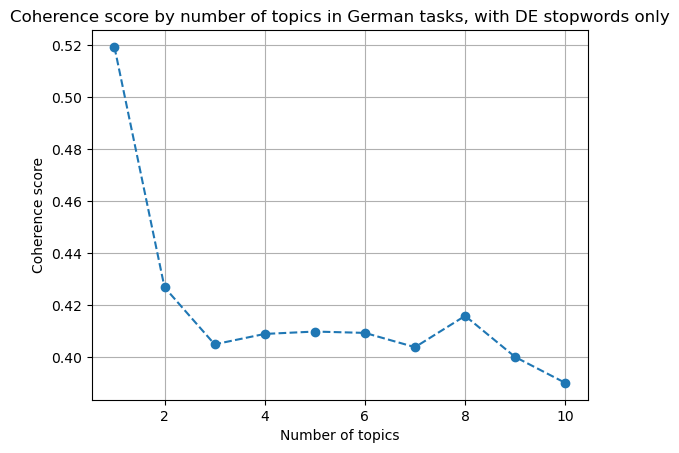

In [39]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# Perform KMeans clustering for different number of clusters
fig, ax = plt.subplots(1, 1)

coh_scores = []
for num_topics in range(1, 11):
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_scores.append(coherence_lda)

# Plot the elbow method graph
ax.plot(range(1, 11), coh_scores, marker='o', linestyle='--')

ax.title.set_text('Coherence score by number of topics in German tasks, with DE stopwords only')
ax.set_ylabel("Coherence score")
ax.set_xlabel('Number of topics')
ax.grid(True)

ax.get_figure().savefig("figures/coh_DE_1", bbox_inches="tight") 

In [40]:
# # Build the LDA model 
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
# Print the keywords for each topic
lda_model.print_topics()

[(0,
  '0.096*"Schreib" + 0.063*"Satz" + 0.027*"Englisch" + 0.026*"Horst" + 0.023*"passiv" + 0.022*"Prasen" + 0.014*"Prateritum" + 0.009*"zwei" + 0.008*"Relativsatz" + 0.008*"Hauptsatz"'),
 (1,
  '0.016*"fur" + 0.010*"Satz" + 0.007*"folgend" + 0.007*"Unternehmen" + 0.007*"Beispiel" + 0.007*"Antwort" + 0.007*"geben" + 0.006*"nenn" + 0.005*"Frage" + 0.005*"zwei"'),
 (2,
  '0.013*"Satz" + 0.008*"fur" + 0.006*"kurz" + 0.006*"Punkt" + 0.005*"Bitt" + 0.005*"Vergangenheit" + 0.005*"passiv" + 0.005*"Unternehmen" + 0.004*"folgend" + 0.004*"falsch"'),
 (3,
  '0.025*"Frage" + 0.020*"Schreib" + 0.018*"Satz" + 0.017*"infinitiv" + 0.010*"bei" + 0.009*"Komma" + 0.009*"fur" + 0.008*"denk" + 0.007*"direkt" + 0.007*"indirekt"'),
 (4,
  '0.012*"Antwort" + 0.010*"Satz" + 0.008*"drei" + 0.007*"nennen" + 0.007*"warum" + 0.007*"geben" + 0.006*"fur" + 0.005*"markiert" + 0.005*"Bild" + 0.005*"nenn"')]

In [41]:
# Evaluation
# from gensim.models import CoherenceModel
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('Coherence Score: ', coherence_lda)

In [42]:
# Visualization 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()

In [43]:
vis = gensimvis.prepare(lda_model, corpus, id2word) 

In [22]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.246856  0.061736       1        1  24.045430
2      0.026516 -0.038519       2        1  22.484546
4      0.134697  0.184654       3        1  20.503902
1      0.037613 -0.131781       4        1  17.242979
3      0.048029 -0.076090       5        1  15.723144, topic_info=          Term        Freq       Total Category  logprob  loglift
658         --  479.000000  479.000000  Default  30.0000  30.0000
3711    Magnet  203.000000  203.000000  Default  29.0000  29.0000
1188   Schreib  600.000000  600.000000  Default  28.0000  28.0000
2898  Englisch  140.000000  140.000000  Default  27.0000  27.0000
2908     Horst  134.000000  134.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
430     passiv   29.422705  153.735512   Topic5  -5.4541   0.1966
3327         m   26.992795  148.993851   Topic5  -5.5403   0.1417
28         bei   25.181942  100.613868   Topic5  -5.6097   0.4649
1381      nenn   21.926860   67.216733   Topic5  -5.7481   0.7298
350      geben   21.731314  149.402578   Topic5  -5.7571  -0.0779

[331 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
658       1  0.884166    --
658       2  0.072985    --
658       3  0.014597    --
658       4  0.018768    --
658       5  0.008341    --
...     ...       ...   ...
481       3  0.273236  zwei
481       4  0.080729  zwei
481       5  0.329125  zwei
6036      1  0.961421     ω
6036      4  0.032047     ω

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])